# ステップ３　多次元正規分布
多次元正規分布（複数の実数値からなるベクトルに関する正規分布）について学ぶ
- ベクトル，行列などの基礎知識の復習
- 多次元正規分布に対する可視化・最尤推定

## 3.1　NumPyと多次元配列
### 3.1.1 多次元配列
$$\text{スカラ（０階テンソル）：}1$$  
$$\text{ベクトル（１階テンソル）：}\begin{pmatrix}1 \\ 2 \\ 3 \end{pmatrix}$$
$$\text{行列（２階テンソル）：}\left(
\begin{matrix} 
a & b \\ 
c & d 
\end{matrix} 
\right)$$
- 行：row
- 列：column
- 次元
    - ベクトルの次元：要素数
    - 行列の次元：軸の数
### 3.1.2 NumPyの多次元配列


In [2]:
import numpy as np
x = np.array([1,2,3])

print(x.__class__) # クラス名
print(x.shape) # 配列形状
print(x.ndim) # 次元数（ベクトルより要素数）

<class 'numpy.ndarray'>
(3,)
1


In [3]:
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print(W.ndim) # 次元数（行列より軸の数）
print(W.shape)

2
(2, 3)


### 3.1.3 要素ごとの演算

In [5]:
W = np.array([[1, 2, 3], 
              [4, 5, 6]])

X = np.array([[0, 1, 2], 
              [3, 4, 5]])
print(W + X)
print('---')
print(W * X) # アダマール積

[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]


### 3.1.4 ベクトルの内積と行列積
$$\bm{x} = \begin{pmatrix}x_1 \\ x_2 \\\vdots \\ x_D \end{pmatrix}$$
$$\bm{y} = \begin{pmatrix}y_1 \\ y_2 \\\vdots \\ y_D \end{pmatrix}$$
$$\bm{x}\cdot\bm{y} = x_1y_1 + x_2y_2 + x_Dy_D$$

In [10]:
# ベクトル内積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)  # a @ b
print(y)

# 行列積
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])
Y = np.dot(A, B)
print(Y)


32
[[19 22]
 [43 50]]


In [11]:
print(a @ b)
print(A @ B)

32
[[19 22]
 [43 50]]


## 3.2 多次元正規分布
$$\bm{x} = \begin{pmatrix}\text{身長} \\ \text{体重} \end{pmatrix}$$
<!-- <p align="center">
  <img src="./output/身長_１次元正規分布.png" alt="１次元正規分布" width="45%" />
  <img src="./output/身長_体重_２次元正規分布.png" alt="２次元正規分布" width="45%" />
</p> -->
<p align="center">
  <img src="./output/身長_１次元正規分布.png" alt="１次元正規分布" height="250px" />
  <img src="./output/身長_体重_２次元正規分布.png" alt="２次元正規分布" height="250px" />
</p>

### 3.2.1 多次元正規分布
$$
\mathcal{N}(x; \mu, \Sigma) =
\frac{1}{\sqrt{(2\pi)^D |\Sigma|}} \exp\left\{
- \frac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu)
\right\}
$$
- $\bm{\mu}：\text{平均ベクトル}$
- $\bm{\Sigma}：\text{共分散行列}$
$$
\begin{array}{cc}
\mu = 
\begin{pmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_D
\end{pmatrix}
\quad & \quad
\Sigma =
\begin{pmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1D} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2D} \\
\vdots      & \vdots      & \ddots & \vdots      \\
\sigma_{D1} & \sigma_{D2} & \cdots & \sigma_{DD}
\end{pmatrix}
\end{array}
$$
$$
\sigma_{ij} = 
\begin{cases}
\text{分散} & \text{if } i = j \\
\text{共分散} & \text{if } i \ne j
\end{cases}
$$

##### 分散・共分散の求め方
$$\mathrm{Var}[x_i] = \mathbb{E} \left[ (x_i - \mu_i)^2 \right]$$
$$\mathrm{Cov}[x_i, x_j] = \mathbb{E} \left[ (x_i - \mu_i)(x_j - \mu_j) \right]$$
- $i = j$のとき，$\mathrm{Cov}[x_i, x_j] = \mathrm{Cov}[x_j, x_i]$であり，$\Sigma^T = \Sigma$が成立




In [12]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]


##### 行列式
$$
\begin{align}
A &=
\begin{pmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{pmatrix}\\
|A| &= a_{11}a_{22}-a_{12}a_{21}
\end{align}
$$

In [13]:
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

-1.9999999999999971


##### 逆行列
$$
\begin{align}
AA^{-1} = A^{-1}A = I = \begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}
\end{align}
A^{-1} = \frac{1}{|A|}\begin{pmatrix}a_{22} & -a_{12} \\ -a_{21} & a_{11}\end{pmatrix}
$$

In [15]:
A = np.array([[3, 4], [5, 6]])
B = np.linalg.inv(A)
print(B)
print('---')
print(A @ B)

[[-3.   2. ]
 [ 2.5 -1.5]]
---
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


### 3.2.2 多次元正規分布の実装
- x :(1, D)または(D, )
- mu :(1, D)または(D, )
- cov :(D, D) 

In [28]:
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2*np.pi)**D * det)
    y = z * np.exp(((x-mu).T @ inv @ (x-mu))/-2.0)
    return y


In [34]:
x_ = np.array([0, 0])
x = np.array([[0], [0]])
mu_ = np.array([1, 2])
mu = np.array([[1], [2]])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
y_ = multivariate_normal(x_, mu_, cov)
print(y_, y_.shape)
print(y, y.shape)

0.013064233284684921 ()
[[0.01306423]] (1, 1)


## 3.3 ２次元正規分布の可視化
### 3.3.1 ３Dグラフの描画方法

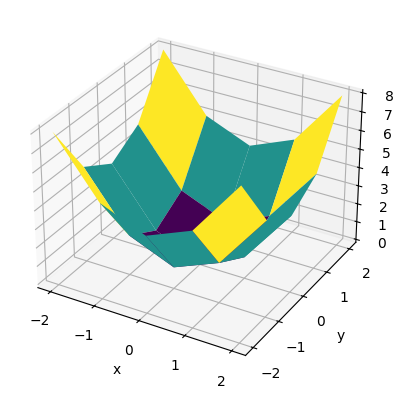

In [40]:
import matplotlib.pyplot as plt

X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

Z = X ** 2 + Y ** 2 # 各要素の二乗和を計算

ax = plt.axes(projection="3d") # 3Dプロットの軸を作成
ax.plot_surface(X, Y, Z, cmap='viridis') # viridisカラーマップで表面をプロット，surface関数で関数の曲面を描画
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

xs: (40,)
ys: (40,)
X: (40, 40)
Y: (40, 40)


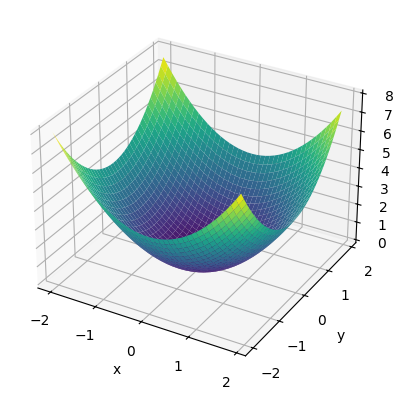

In [41]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
print("xs:", xs.shape)
print("ys:", ys.shape)

X, Y = np.meshgrid(xs, ys) # メッシュグリッドは2次元の格子点を生成
print("X:", X.shape)
print("Y:", Y.shape)
Z = X ** 2 + Y ** 2

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 3.3.2 等高線の描画


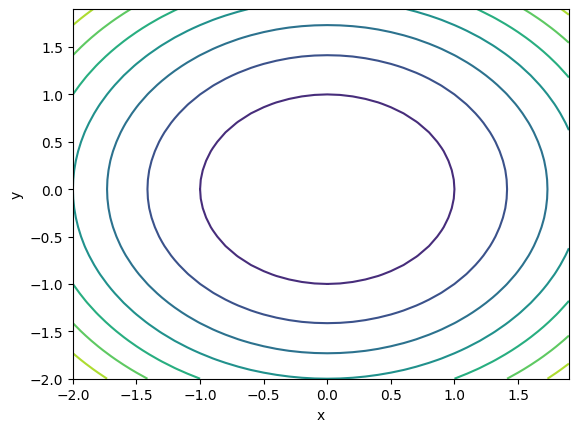

In [43]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z) # counterで等高線を描画
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### 3.3.3 ２次元正規分布のグラフ

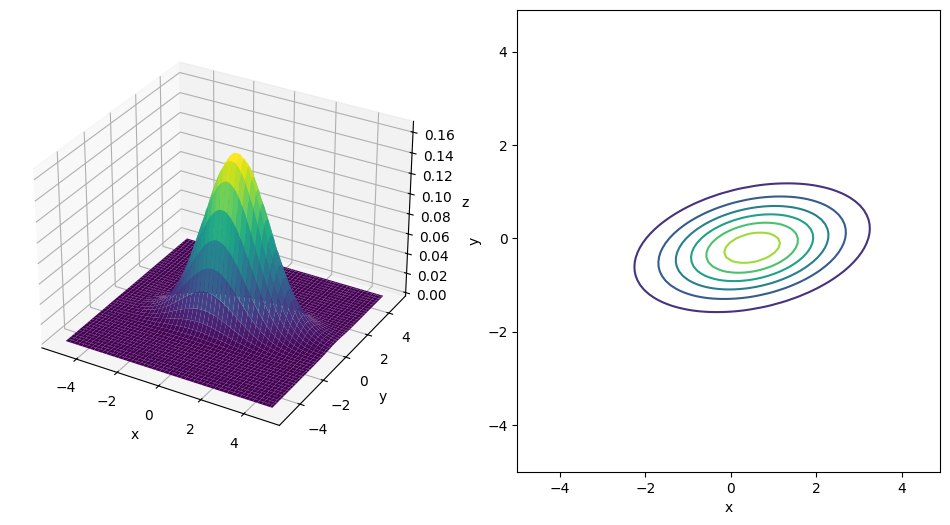

In [45]:
mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X) # ZをXと同じ形状のゼロ行列で初期化

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x = np.array([X[i, j], Y[i, j]]) # 各点の座標を取得
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # 1行，2列のサブプロットの1つ目に3Dプロットを作成
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2) # 1行，2列のサブプロットの2つ目に2Dプロットを作成
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()


- 平均ベクトル：グラフの山の頂上（正規分布より）
- 共分散行列：グラフの山の広がり（cov[0,0]＝ｘの分散，cov[1,1]＝ｙの分散）
    - 共分散>0：正の相関
    - 共分散<0：負の相関
    - 共分散=0：二つの変数に関連性がない

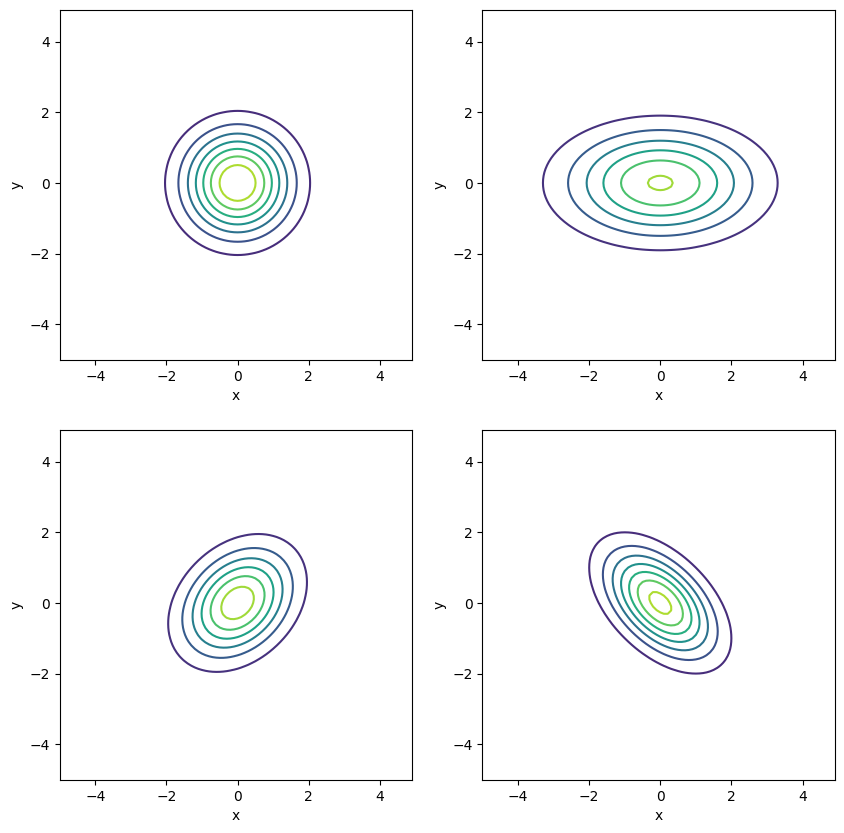

In [47]:
mu1 = np.array([0.0, 0.0])
cov1 = np.array([[1.0, 0.0],
                [0.0, 1.0]])

mu2 = np.array([0.0, 0.0])
cov2 = np.array([[3.0, 0.0],
                [0.0, 1.0]])

mu3 = np.array([0.0, 0.0])
cov3 = np.array([[1.0, 0.3],
                [0.3, 1.0]])

mu4 = np.array([0.0, 0.0])
cov4 = np.array([[1.0, -0.5],
                [-0.5, 1.0]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z1 = np.zeros_like(X)
Z2 = np.zeros_like(X)
Z3 = np.zeros_like(X)
Z4 = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x = np.array([X[i, j], Y[i, j]]) # 各点の座標を取得
        Z1[i, j] = multivariate_normal(x, mu1, cov1)
        Z2[i, j] = multivariate_normal(x, mu2, cov2)
        Z3[i, j] = multivariate_normal(x, mu3, cov3)
        Z4[i, j] = multivariate_normal(x, mu4, cov4)

fig = plt.figure(figsize=(10, 10))

ax2 = fig.add_subplot(2, 2, 1) # 1行，2列のサブプロットの2つ目に2Dプロットを作成
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z1)

ax2 = fig.add_subplot(2, 2, 2) # 1行，2列のサブプロットの2つ目に2Dプロットを作成
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z2)

ax2 = fig.add_subplot(2, 2, 3) # 1行，2列のサブプロットの2つ目に2Dプロットを作成
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z3)

ax2 = fig.add_subplot(2, 2, 4) # 1行，2列のサブプロットの2つ目に2Dプロットを作成
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z4)
plt.show()


## 3.4 多次元正規分布の最尤推定
### 3.4.1 最尤推定を行う
サンプル$\mathcal{D} = \{x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$が得られたときの確率密度
$$
\begin{align}
p(\mathcal{D}; \mu, \Sigma)
&= \mathcal{N}(x^{(1)}; \mu, \Sigma)\, \mathcal{N}(x^{(2)}; \mu, \Sigma)\, \dots\, \mathcal{N}(x^{(N)}; \mu, \Sigma) \\
&= \prod_{n=1}^{N} \mathcal{N}(x^{(n)}; \mu, \Sigma)
\end{align}
$$

- $\mathcal{N}(x^{(1)}; \mu, \Sigma)$：パラメータ$\mu, \Sigma$としたときのサンプルが得られる確率密度
- 尤度：パラメータを引数としたときの確率密度
- 最尤推定：尤度を最大にするパラメータを求める（以下の式から求める）

$$
L(\mu, \Sigma) = \log p(\mathcal{D}; \mu, \Sigma)
$$
- (対数を取ると微分した対数の和の最大値を求めるため計算上都合が良い)
$$
\frac{\partial L}{\partial \mu} = 0
\qquad
\frac{\partial L}{\partial \Sigma} = 0
$$
- **勾配**は以下のように表される


$$
\mu =
\begin{pmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_D
\end{pmatrix}
\qquad
\frac{\partial L}{\partial \mu} =
\begin{pmatrix}
\frac{\partial L}{\partial \mu_1} \\
\frac{\partial L}{\partial \mu_2} \\
\vdots \\
\frac{\partial L}{\partial \mu_D}
\end{pmatrix}
$$

$$
\Sigma =
\begin{pmatrix}
\sigma_{11} & \cdots & \sigma_{1i} & \cdots & \sigma_{1D} \\
\vdots & \ddots & \vdots & \ddots & \vdots \\
\sigma_{i1} & \cdots & \sigma_{ii} & \cdots & \sigma_{iD} \\
\vdots & \ddots & \vdots & \ddots & \vdots \\
\sigma_{D1} & \cdots & \sigma_{Di} & \cdots & \sigma_{DD}
\end{pmatrix}
\qquad
\frac{\partial L}{\partial \Sigma} =
\begin{pmatrix}
\frac{\partial L}{\partial \sigma_{11}} & \cdots & \frac{\partial L}{\partial \sigma_{1D}} \\
\vdots & \ddots & \vdots \\
\frac{\partial L}{\partial \sigma_{D1}} & \cdots & \frac{\partial L}{\partial \sigma_{DD}}
\end{pmatrix}
$$

- 上記の式を求めることで以下の式が導出される
$$\hat{\mu} = \frac{1}{N} \sum_{n=1}^{N} x^{(n)}$$
$$\hat{\Sigma} = \frac{1}{N} \sum_{n=1}^{N} (x^{(n)} - \hat{\mu})(x^{(n)} - \hat{\mu})^\top$$

- 上記のベクトルの形状
    - $x^{(n)}$：D*1
    - $x^{(n)}-\hat{\mu}$：D*D
    - $(x^{(n)}-\hat{\mu})^T$：1*D

### 3.4.2 最尤推定の実装

In [54]:
np.random.seed(0)

N = 10000
D = 2
xs = np.random.rand(N, D)  # 標準正規分布に従う乱数，N行D列の行列を生成

mu = np.sum(xs, axis=0)  # 各列の平均を計算（axis＝0よりNの軸で計算）

mu /= N

cov = 0

for n in range(N):
    x = xs[n]
    z = x - mu
    if n == 0:
        print("z before:", z.shape)
    z = z[:, np.newaxis]  # 列ベクトルに変換（新しい軸を追加することで対応）
    if n == 0:
        print("z after:", z.shape)
    cov += z @ z.T  # 外積を計算して累積

cov /= N  # 平均を取る

print("mu:", mu)
print("cov:", cov)

z before: (2,)
z after: (2, 1)
mu: [0.49443495 0.49726356]
cov: [[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]


In [55]:
print(np.mean(xs, axis=0))
print(np.cov(xs, rowvar=False))  # 各列の分散共分散行列を計算（rowvar=Falseで行を変数とみなす．Trueで列を変数とみなす．）

[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


- 各要素が独立であるため，非対角要素は０に近い
- 一様分布の平均と分散を示している
### 3.4.3 実データを使う

In [57]:
path = 'height_weight.txt'
xs = np.loadtxt(path)

print(xs.shape)

(25000, 2)


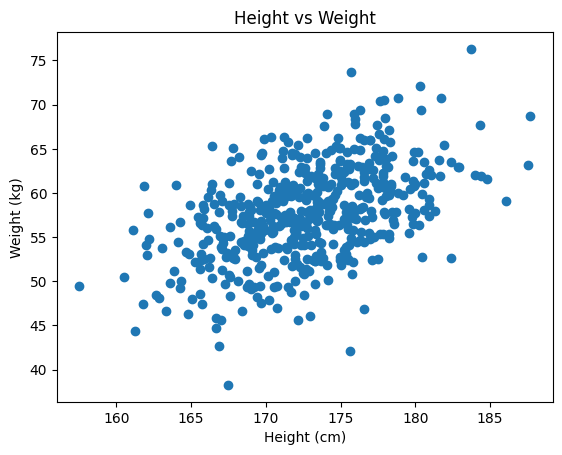

In [59]:
small_xs = xs[:500] # 最初の500行を抽出

plt.scatter(small_xs[:, 0], small_xs[:, 1]) # small_xsの1列目(身長)と2列目(体重)を散布図で表示
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

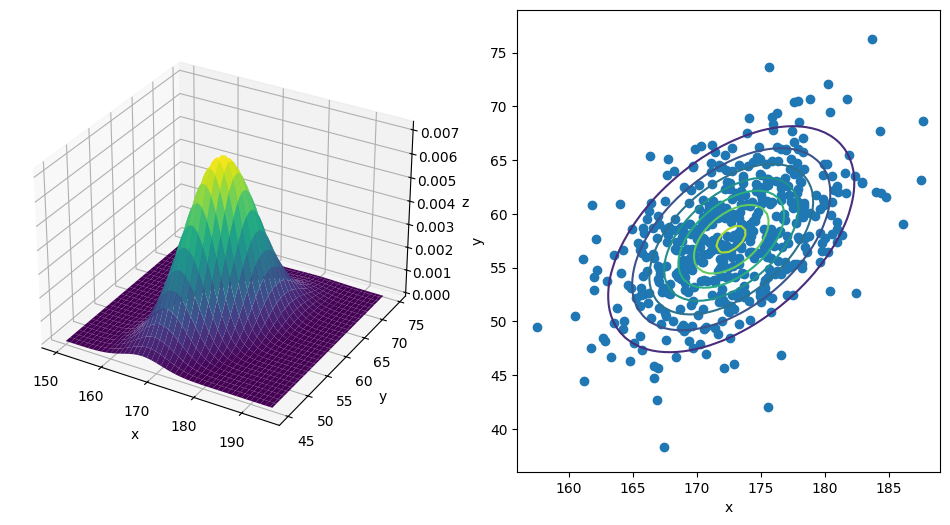

In [61]:
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()